In this file we will expolore our dataset from"Employers" of Drexel students answering the question "What are the student's strengths?"

In [1]:
#Importing necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

In [2]:
# Importing datasets and print sheet names
xls = pd.ExcelFile('/Users/otabekjuraev/OneDrive - Sejong University/DREXEL/Courses/MIS/Week 3/dataset/student_data.xlsx')
xls.sheet_names



['Classroom Activities Question',
 'Coursework Question',
 'Most Imp Skills',
 'Skills to develop',
 'What made job interesting',
 'Learn & Focus on']

In [3]:
df = xls.parse('Coursework Question')
df

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Major Conc,Co-op #,Citizenship Status,What coursework did you apply most during your co-op?
0,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,"Applied Computer Science, Statistics, Business..."
1,29,201415-201425,SR,B,ACCT,4COP,NaN,Only,US Citizen,"Critical reasoning, Interactive Marketing, Int..."
2,55,201415-201425,JR,B,ACCT,5COP,NaN,Third,US Citizen,Accounting coursework and intro to finance. B...
3,61,201425-201425,JR,B,BAE,5COP,NaN,Second,Non US Citizen,"Accounting, MIS"
4,60,201415-201415,JR,B,BAE,5COP,NaN,Second,Non US Citizen,Management Information Systems_x000D_\nIntrodu...
...,...,...,...,...,...,...,...,...,...,...
1431,5921,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,During my Co-op experience I referred back to ...
1432,5922,201435-201435,JR,B,MKTG,5COP,NaN,First,Non US Citizen,marketing
1433,5932,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,"Marketing, Organizational Behavior."
1434,5938,201435-201445,PJ,B,GBUS,4COP,NaN,Only,US Citizen,Organizational Behavior. Writing for Business.


In [4]:
# So we have 1436 rows and 10 columns in our dataset.

In [5]:
df.shape

(1436, 10)

In [6]:
# Checking for missing values in columns
df.isnull().sum()

Respondent ID                                               0
Work Terms                                                  0
Class (BOT)                                                 0
College Code                                                0
Major Code                                                  0
Coop Conc                                                   0
Major Conc                                               1405
Co-op #                                                     0
Citizenship Status                                          0
What coursework did you apply most during your co-op?      19
dtype: int64

In [7]:
# We have 1375 missing values in "Major Conc" column, since don't neet this data we delete it from our dataframe.
try:
    df.isnull().sum()
    df = df.drop("Major Conc", axis=1)
except:
    print("Completed")


# Delete rows with missing values

In [8]:
df = df.dropna(subset=["What coursework did you apply most during your co-op?"])

In [9]:
# This is how our target text data looks like. 708 rows of valid data left
df

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Co-op #,Citizenship Status,What coursework did you apply most during your co-op?
0,11,201415-201425,JR,B,FIN,4COP,Only,US Citizen,"Applied Computer Science, Statistics, Business..."
1,29,201415-201425,SR,B,ACCT,4COP,Only,US Citizen,"Critical reasoning, Interactive Marketing, Int..."
2,55,201415-201425,JR,B,ACCT,5COP,Third,US Citizen,Accounting coursework and intro to finance. B...
3,61,201425-201425,JR,B,BAE,5COP,Second,Non US Citizen,"Accounting, MIS"
4,60,201415-201415,JR,B,BAE,5COP,Second,Non US Citizen,Management Information Systems_x000D_\nIntrodu...
...,...,...,...,...,...,...,...,...,...
1431,5921,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,During my Co-op experience I referred back to ...
1432,5922,201435-201435,JR,B,MKTG,5COP,First,Non US Citizen,marketing
1433,5932,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,"Marketing, Organizational Behavior."
1434,5938,201435-201445,PJ,B,GBUS,4COP,Only,US Citizen,Organizational Behavior. Writing for Business.


In [10]:
#check for missiing values
df.isnull().sum()

Respondent ID                                            0
Work Terms                                               0
Class (BOT)                                              0
College Code                                             0
Major Code                                               0
Coop Conc                                                0
Co-op #                                                  0
Citizenship Status                                       0
What coursework did you apply most during your co-op?    0
dtype: int64

In [11]:
# No missing values in our dataset

# Working on removing contraction words

Before removing all punctuation we will convert contractions into whole words not to lose some information.

"Contractions are a unique type of word that combines two or more other words in a shortened form, 
usually with an apostrophe. Contractions take words that usually go together, 
like can not or I have, and then remove certain letters to shorten them and make other words, like can’t or I’ve." (Source: https://www.grammarly.com/blog/contractions/)

It is useful to keep those word in order to keep sentiment of the sentences.

In [12]:
import contractions

In [13]:
contractions_re=re.compile('(%s)' % '|'.join(contractions.contractions_dict.keys()))

In [14]:
contractions.contractions_dict.keys()

dict_keys(["I'm", "I'm'a", "I'm'o", "I've", "I'll", "I'll've", "I'd", "I'd've", 'Whatcha', "amn't", "ain't", "aren't", "'cause", "can't", "can't've", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", 'didn’t', "don't", 'don’t', "doesn't", "e'er", "everyone's", 'finna', 'gimme', "gon't", 'gonna', 'gotta', "hadn't", "hadn't've", "hasn't", "haven't", "he've", "he's", "he'll", "he'll've", "he'd", "he'd've", "here's", "how're", "how'd", "how'd'y", "how's", "how'll", "isn't", "it's", "'tis", "'twas", "it'll", "it'll've", "it'd", "it'd've", 'kinda', "let's", 'luv', "ma'am", "may've", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "ne'er", "o'", "o'clock", "ol'", "oughtn't", "oughtn't've", "o'er", "shan't", "sha'n't", "shalln't", "shan't've", "she's", "she'll", "she'd", "she'd've", "should've", "shouldn't", "shouldn't've", "so've", "so's", "somebody's", "someone's", "something's", 'sux', "that're", "

In [15]:
dt = contractions.contractions_dict
def update_text(text):
    for key in dt:
        text = re.sub(key, dt[key], text)
    return text

In [16]:
def expand_contractions(text,contractions_dict=contractions.contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [17]:
df["processed"] = df["What coursework did you apply most during your co-op?"].apply(lambda x: update_text(x))
df.sample(10)

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Co-op #,Citizenship Status,What coursework did you apply most during your co-op?,processed
1433,5932,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,"Marketing, Organizational Behavior.","Marketing, Organizational Behavior."
500,5065,201415-201425,PJ,B,BAE,5COP,Second,US Citizen,"Business 101, 102.","Business 101, 102."
1343,5161,201445-201445,SR,B,ACCT,5COP,Third,US Citizen,I think the most useful has been the series of...,I think the most useful has been the series of...
559,5407,201415-201425,JR,B,MIS,5COP,Third,US Citizen,none,none
658,133,201445-201445,PJ,B,MKTG,5COP,Second,US Citizen,"Accounting, Business Basics, MIS 200","Accounting, Business Basics, MIS 200"
317,3871,201415-201425,JR,B,GBUS,4COP,Only,US Citizen,STAT 201 _x000D_\nFIN 301_x000D_\n,STAT 201 _x000D_\nFIN 301_x000D_\n
212,3210,201415-201425,SO,B,LGST,5COP,First,Non US Citizen,"Data research, and communicate with people.","Data research, and communicate with people."
298,3741,201415-201425,JR,B,MKTG,5COP,First,US Citizen,Data managment through excell,Data managment through excell
1206,3793,201435-201445,SR,B,INT1,5COP,Second,Non US Citizen,"Accounting, Finance","Accounting, Finance"
1135,3395,201435-201445,PJ,B,FIN,5COP,First,US Citizen,Business Statistics and economics.,Business Statistics and economics.


# Lowercase the text

In [18]:
df['processed']=df["processed"].apply(lambda x: x.lower())

In [19]:
#checking results
df["processed"]

0       applied computer science, statistics, business...
1       critical reasoning, interactive marketing, int...
2       accounting coursework and intro to finance.  b...
3                                         accounting, mis
4       managthement information systthems_x000d_\nint...
                              ...                        
1431    during my co-op experience i referred back to ...
1432                                           marcheting
1433                  marketing, organizational behavior.
1434       organizational behavior. writing for business.
1435                                       computer skill
Name: processed, Length: 1417, dtype: object

# Remove all digits

In [20]:
df['processed']=df['processed'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))
#checking results
df["processed"]

0       applied computer science, statistics, business...
1       critical reasoning, interactive marketing, int...
2       accounting coursework and intro to finance.  b...
3                                         accounting, mis
4       managthement information \nintroduction to ent...
                              ...                        
1431    during my co-op experience i referred back to ...
1432                                           marcheting
1433                  marketing, organizational behavior.
1434       organizational behavior. writing for business.
1435                                       computer skill
Name: processed, Length: 1417, dtype: object

## Remove special characters

In [21]:
df['processed']=df['processed'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', str(x)))

In [22]:
df["processed"]

0       applied computer science statistics business c...
1       critical reasoning interactive marketing intro...
2       accounting coursework and intro to finance boo...
3                                          accounting mis
4       managthement information introduction to entre...
                              ...                        
1431    during my co op experience i referred back to ...
1432                                           marcheting
1433                   marketing organizational behavior 
1434        organizational behavior writing for business 
1435                                       computer skill
Name: processed, Length: 1417, dtype: object

# Removing punctuations

In [23]:
df['processed'] = df['processed'].apply(lambda i: re.sub('[%s]' % re.escape(string.punctuation), '', str(i)))

In [24]:
#Checking the results
df['processed'].sample(10)

276                                                      
202     business we learned in depth about a lot of us...
678                         intro to finance account and 
1046                          accounting general business
524     managerial accounting financial accounting fin...
908                            english math and business 
264                           business accounting english
29      statistics and microsoft excel were important ...
321     balance sheets financial literacy attention to...
323                                           accounting 
Name: processed, dtype: object

# Removing extra spaces between words

In [25]:
df.loc['processed']=df['processed'].apply(lambda i: re.sub(' +',' ',i))

In [26]:
# Checking results
df["processed"].sample(10)

1097                                   accounting classes
1347       business law finance managthement and algebra 
330                                              opm mem 
659           my basic business and accounting knowledge 
193                                           accounting 
397     managthement information systthems and busines...
1270                              photoshop and marketing
616                              financial basic business
1433                   marketing organizational behavior 
825                                                  none
Name: processed, dtype: object

# Removing Stop words

In [27]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [28]:
txt = df['processed'].values[0]
i =0
for token in list(nlp(txt)):
    print(i+1,":", token, token.is_stop, token.lemma_)
    i = i+1
#checking the results

1 : applied False apply
2 : computer False computer
3 : science False science
4 : statistics False statistic
5 : business False business
6 : communication False communication


#  Lemmitazation 
# Removing stop words  
# Correcting misspelled words

In [29]:
from textblob import TextBlob
def rem_stop_words_lemmatizing(txt):
    ans = []
    for token in nlp(txt):
        # Cheking and removing stop words
        if not token.is_stop:
            # This part lemmatizes words, checks misspelled words and corrects them
            ans.append(str(token.lemma_))
    return " ".join([word for word in ans])

In [30]:
# df['lemmatized']=df['processed'].apply(lambda i: ' '.join([token.lemma_ for token in list(nlp(i)) if (token.is_stop==False)]))
df['lemmatized'] = df['processed'].astype(str).apply(lambda x: rem_stop_words_lemmatizing(x))


In [31]:
# Checking the results
df.sample(15)["lemmatized"]

1       critical reasoning interactive marketing intro...
1054    course apply co op managthement information sy...
679                                            accounting
243                         business micro macro economic
270                                              business
825                                                      
38                                             accounting
449                                       statistic class
613     probably stat class taugustt statistical analy...
486                                 accounting coursework
311                                        basic economic
265                                              business
1393    coursework apply co op business communication ...
778                                                      
189                                   accounting business
Name: lemmatized, dtype: object

In [32]:
# Checking results
print("Edited >>:", df.loc[478, "lemmatized"])
print("Unedited >>:", df.loc[478, "processed"])


Edited >>: mis database design strategic managthement mgmt marketing course
Unedited >>: mis database design strategic managthement mgmt and various marketing courses 


# Vectorize preprocessed data

## N-gram (n=1)

In [33]:
# Here we will create Words frequency matrix (One-word) 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (1,1))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm_1 = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm_1.index=df.index
df_dtm_1.head(3)

,ability,able,absolutely,acadthemic,account,accounting,accoute,accoutne,accrual,acct,...,working,workplace,worksheet,workshop,world,write,writing,writting,year,yield
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## N-gram (n=2)

In [34]:
# Here we will create Words frequency matrix (Two word)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (2,2))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df.index
df_dtm.head(3)

,ability conduct,ability listen,ability understand,ability use,able analyze,able apply,able begin,able class,able complete,able execute,...,writing intensive,writing learn,writing skill,writing summarche,writting analytical,year drexel,year school,year spring,year writing,yield curve
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize data

## Word Cloud

In [35]:
from wordcloud import WordCloud
from textwrap import wrap

## Word Cloud One-word

In [36]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

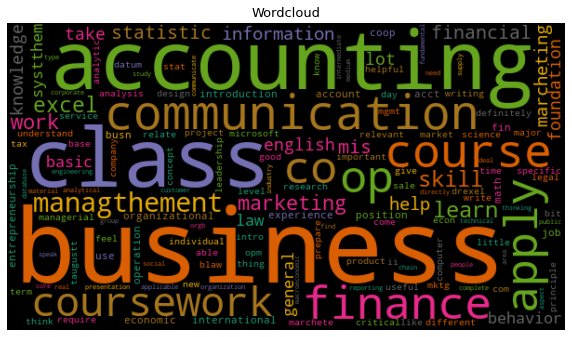

In [37]:
generate_wordcloud(data = df_dtm_1.sum(axis=0).to_dict(), title = "Wordcloud")

# Word frequency bar chart One-word

In [38]:
word_freqs_1 = df_dtm_1.sum(axis=0).sort_values(ascending=False)[:30].to_dict()

word_freqs_1.pop("class")
word_freqs_1.pop("course")
word_freqs_1.pop("co")
word_freqs_1.pop("op")
word_freqs_1.pop("apply")
word_freqs_1.pop("learn")
word_freqs_1.pop("skill")
word_freqs_1.pop("work")
word_freqs_1.pop("information")
word_freqs_1.pop("take")
word_freqs_1.pop("help")
word_freqs_1.pop("lot")
word_freqs_1.pop("general")
word_freqs_1.pop("coursework")
word_freqs_1["marketing"] = word_freqs_1.pop("marcheting")
word_freqs_1["system"] = word_freqs_1.pop("systthem")

word_freqs_1

{'business': 515,
 'accounting': 301,
 'communication': 184,
 'finance': 168,
 'managthement': 140,
 'excel': 88,
 'marketing': 53,
 'financial': 64,
 'mis': 62,
 'statistic': 61,
 'english': 50,
 'knowledge': 47,
 'foundation': 46,
 'behavior': 43,
 'system': 43}

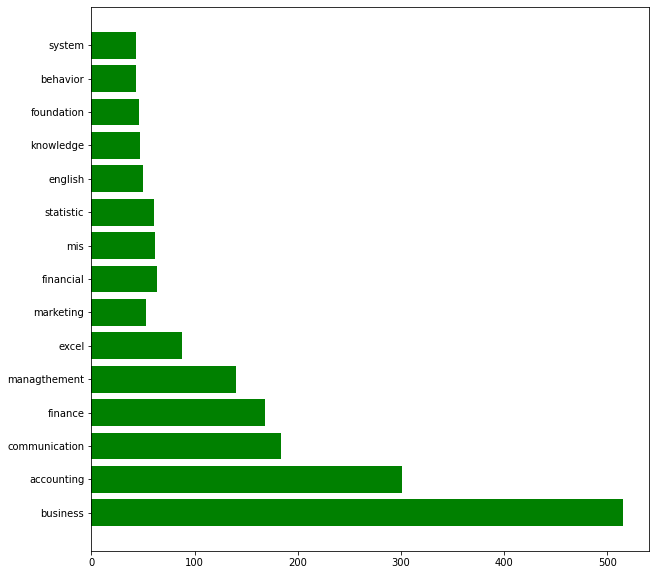

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs_1)), word_freqs_1.values(),color='green')

plt.yticks(range(len(word_freqs_1)), word_freqs_1.keys())
plt.yticks(rotation = 0)
plt.show()

## Word Cloud One-word

In [40]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

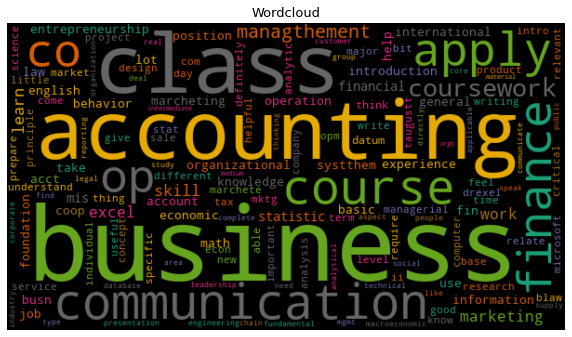

In [41]:
generate_wordcloud(data = df_dtm_1.sum(axis=0).to_dict(), title = "Wordcloud")

# Word frequency bar chart Two-word

In [42]:
word_freqs_2 = df_dtm.sum(axis=0).sort_values(ascending=False)[:17].to_dict()
try:
    word_freqs_2['financial accounting'] = "67"
    word_freqs_2.pop("accounting finance")
    word_freqs_2.pop("finance accounting")
    word_freqs_2.pop("co op")
    word_freqs_2.pop("apply co")
    word_freqs_2.pop("coursework apply")
    word_freqs_2.pop("business business")
    word_freqs_2.pop("apply coursework")

    word_freqs_2.pop("course work")
    word_freqs_2.pop("class help")
    word_freqs_2.pop("class co")

    
except KeyError:
    print("Ok")






Ok
